https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/TimeSeries_Decompose.ipynb

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv")
df.head()

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561


In [3]:
df.dtypes

Quarter       object
Revenue        int64
Net Income     int64
dtype: object

In [4]:
#parse the quarter column
from datetime import datetime
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

df['Quarter']=df['Quarter'].apply(parse)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [6]:
df.set_index('Quarter',inplace=True)

In [7]:
import plotly_express as px
import plotly.graph_objects as go
fig=go.Figure()
fig.update_xaxes(rangeslider_visible=True)
fig.add_trace(go.Scatter(x=df.index, y=df["Revenue"], mode='lines', name=f'Revenue Trend', ))#line=dict(dash='dot', color='blue')))
fig.show()


we see that the above time series data is non stationary(no constant mean). We need stationarity in ts data to fit in models like AR , MA. To remove the cyclic/seasonal component, we decompose the ts and make it stationary

### Statistical tests for timeseries

#### Tests for stationarity of time series: Additive and multiplicative tests

https://www.youtube.com/watch?v=pLHm4cvoZiY&list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK&index=5

### KPSS TEST
observable time series is stationary around a deterministic trend( the residual is stationary)

Null hypothesis: time series is stationary around a deterministic trend

Hypothesis hypothesis: time series is not stationary around a deterministic trend


parameters: xarray_like, 1d
The data series to test.

regressionstr{“c”, “ct”}
The null hypothesis for the KPSS test.

“c” : The data is stationary around a constant (default).

“ct” : The data is stationary around a trend.

In [8]:
from statsmodels.tsa.stattools import kpss
tstest=kpss(df['Revenue'], 'ct')
tstest

C:\Users\soundarya.sarathi\AppData\Local\Temp\ipykernel_11172\335455696.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(np.float64(0.30665545975169417),
 np.float64(0.01),
 4,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

0.306 > 0.146 so we reject the null hypothesis

### Decompose the time series

Multiplicative : yt=Tt x St x Rt

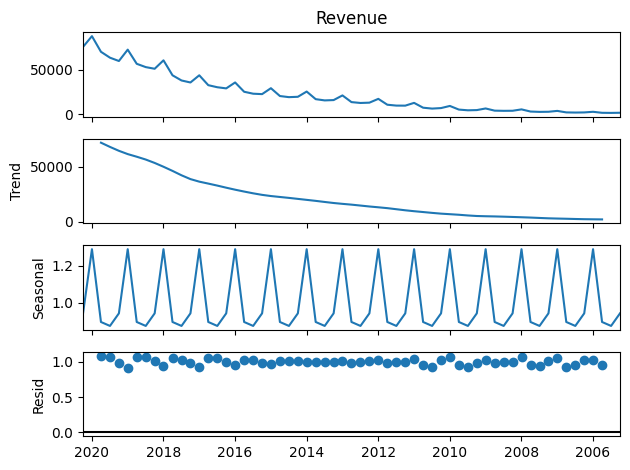

In [9]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df['Revenue'], model='multiplicative')
resplot = res.plot()

In [10]:
res

<Axes: xlabel='Quarter'>

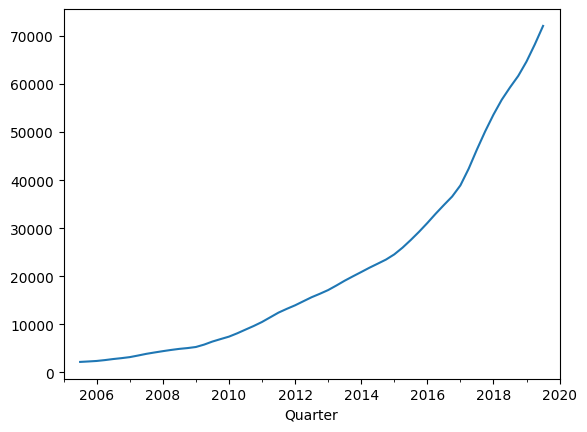

In [11]:
res.trend.plot()

In [15]:
res.observed

Quarter
2020-03-31    75452.0
2019-12-31    87437.0
2019-09-30    69981.0
2019-06-30    63404.0
2019-03-31    59700.0
               ...   
2006-03-31     2279.0
2005-12-31     2977.0
2005-09-30     1858.0
2005-06-30     1753.0
2005-03-31     1902.0
Name: Revenue, Length: 61, dtype: float64

<Axes: xlabel='Quarter'>

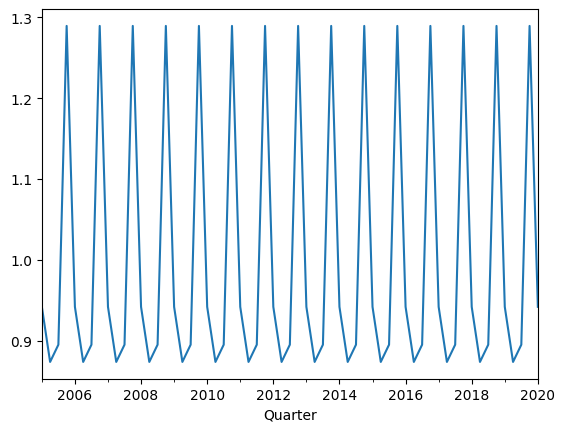

In [13]:
res.seasonal.plot()

<Axes: xlabel='Quarter'>

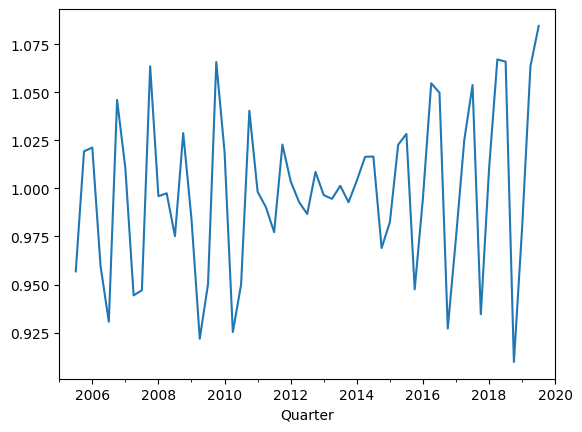

In [14]:
res.resid.plot()

In [16]:
res.observed[2]

C:\Users\soundarya.sarathi\AppData\Local\Temp\ipykernel_11172\1970690673.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



np.float64(69981.0)

In [17]:
res.trend[2]*res.seasonal[2]*res.resid[2]

C:\Users\soundarya.sarathi\AppData\Local\Temp\ipykernel_11172\1852622839.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



np.float64(69980.99999999999)

<Axes: xlabel='Quarter'>

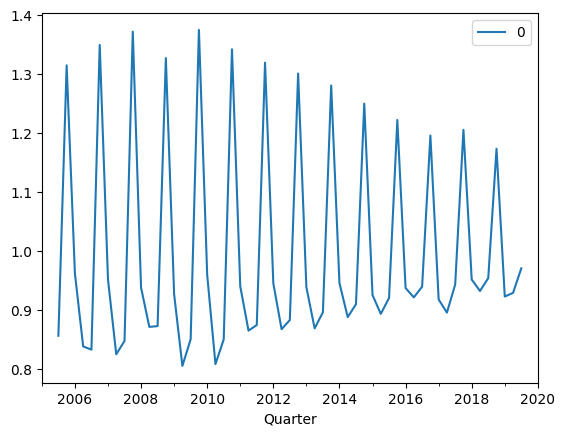

In [18]:
pd.DataFrame(res.observed/res.trend).plot()